<b>BDS^3</b> Ukrainian Biological Data Science School

2024-06, Uzhzhorod 

<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b> 🦠 Курс "Аналіз мікробіому. Пошук ассоціацій з хворобами"</b> 

<i> by Kateryna Pantiukh </i> 
https://github.com/Chartiza 
</div>

**Практичний блок 6. MWAS visualisation**

MWAS (Metagenome-Wide Association Study) — це дослідження, яке використовується для вивчення зв'язків між метагеномом та певними хворобами, станами здоров'я або іншими фенотипами. Подібно до геномних асоціативних досліджень (GWAS), MWAS аналізує велику кількість бактерій одночасно, щоб визначити, які з них асоційовані з цікавим фенотипом.

<p><div class="alert-success" style="padding: 20px; border-radius: 10px">
<b> PACKAGES </b> </div>


- Перед початком роботи треба "включити" пакети, які ми будемо використовувати. 
- Якщо це перший раз використання, спочатку требя їх встановити на компьютер за допомогою команді **% pip install package-name**, як наприклад:

<i> % pip install pandas </i>

- Після того як пакети встановленні кожен наступни раз пакет можно зразу "підключити" за допомогою команди **import package-name**

- Для виконання команди треба буде писати назву пакету, тому для зручності ми можемо скоротити назву за допомогою команди **as short_name**, наприклад:

<i> import pandas as pd </i>


In [ ]:
#%pip install pandas

In [26]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.metrics import pairwise_distances
import statsmodels.api as sm
import numpy as np
from matplotlib.patches import Patch

Real plot example

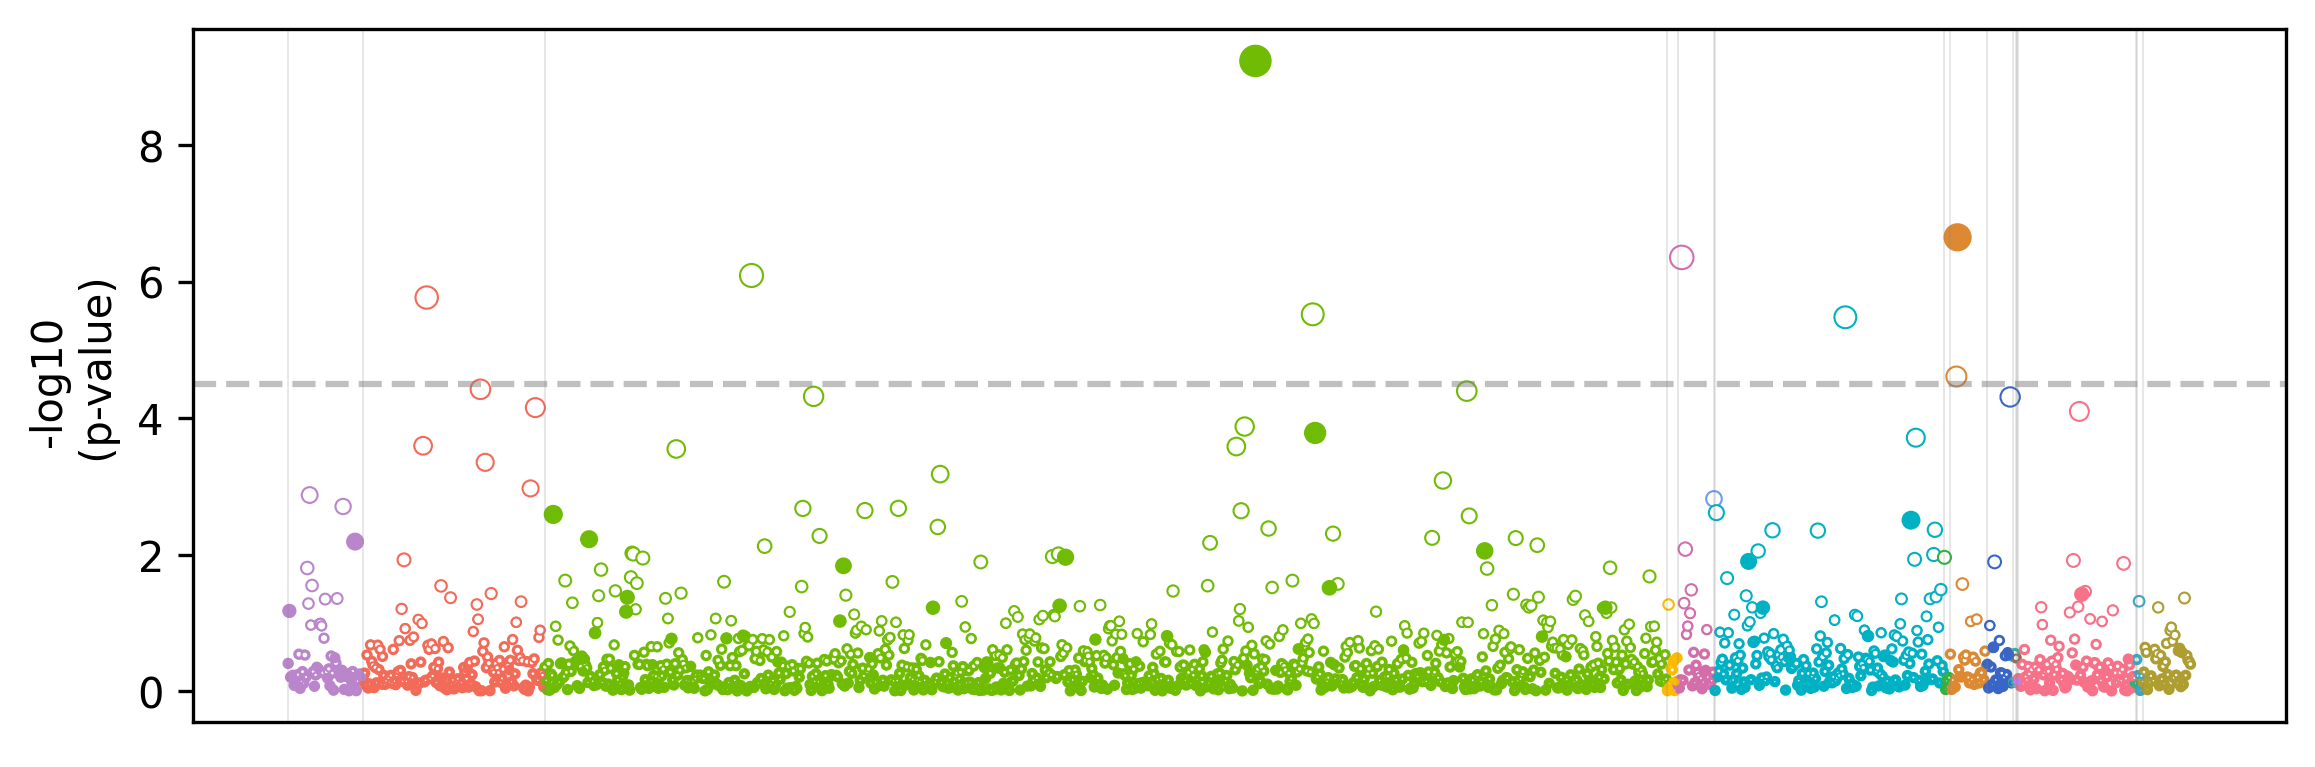

ICD10 code I50: <b>Heart failure</b>

Plot from preprint 10.1101/2024.07.06.602324 has posted on bioRxiv: https://biorxiv.org/cgi/content/short/2024.07.06.602324v1

## Make a plot

In [60]:
# прочитати дані з файлу з результатами MWAS
ass = pd.read_csv('results/Pval_all.csv')
ass.tail(2)

,bacteria,p-value,betta
28,Brachyspira sp934725525,0.892428,0.003051
29,Lactobacillus acidophilus,0.931248,-0.002884


In [61]:
# прочитати файл з таксономією видів
mag = pd.read_excel('input/mag_data_taxa.xlsx')
mag = mag.drop(columns=['sample_names'])
mag = mag.drop_duplicates()
mag.tail(2)

,species,domain,phylum,class,order,family,genus,sp
184,Merdibacter merdipullorum,Bacteria,Bacillota,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Merdibacter,Merdibacter merdipullorum
244,Ruminococcus_E bromii_B,Bacteria,Bacillota_A,Clostridia,Oscillospirales,Acutalibacteraceae,Ruminococcus_E,Ruminococcus_E bromii_B


In [62]:
# поєднати та сортувати
df = ass.merge(mag, left_on='bacteria', right_on='species', how='left')

df = df.sort_values(by=['sp'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['genus'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['family'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['order'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['class'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['genus'], ascending=True).reset_index(drop=True)
df = df.sort_values(by=['phylum'], ascending=True).reset_index(drop=True)

df.head(2)

,bacteria,p-value,betta,species,domain,phylum,class,order,family,genus,sp
0,Bifidobacterium longum,0.000988,0.105405,Bifidobacterium longum,Bacteria,Actinomycetota,Actinomycetia,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,Bifidobacterium longum
1,Bifidobacterium bifidum,0.150525,-0.045454,Bifidobacterium bifidum,Bacteria,Actinomycetota,Actinomycetia,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,Bifidobacterium bifidum


In [73]:
# створити кастомну палетку кольорів
colors = {
        "Actinomycetota": '#3cc24e',
        "Bacillota": '#cc2921',
        "Bacillota_A": '#d950a9',
        "Bacillota_C": 'violet',
        "Bacteroidota": '#dc8932',
        "Pseudomonadota": '#50d9cb',      
        "Spirochaetota": '#2193cc',     
        "Verrucomicrobiota": '#d46eab'
    }

In [64]:
# перевірити що всі phyla включені в палетку
df.phylum.unique()

array(['Actinomycetota', 'Bacillota', 'Bacillota_A', 'Bacillota_C',
       'Bacteroidota', 'Pseudomonadota', 'Spirochaetota',
       'Verrucomicrobiota'], dtype=object)

In [74]:
# назначити колір кожній бактеріі згідно з належністю до phylum
df['color'] = df['phylum'].map(lambda x: colors.get(x, 'default_color'))


In [66]:
# Convert p-values to -log10(p-value) to emphasize smaller p-values
df['minusLog10PValue'] = -np.log10(df['p-value'])
# назначити розмір кожній бактеріі згідно з p-value
df['point_size'] = np.log10(1 / df['p-value']) * 10

# Візуалізауія

Text(0.5, 0, 'Bacteria species')

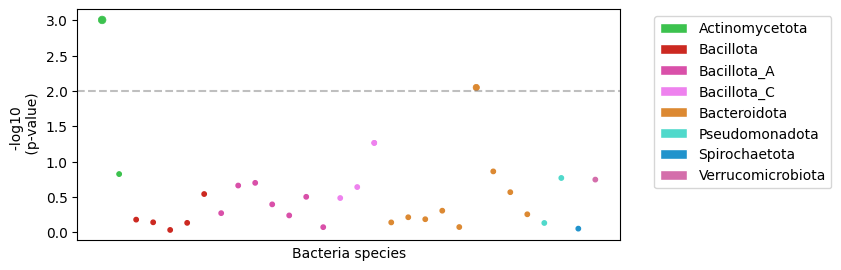

In [78]:
plt.figure(figsize=(7, 3))
plt.scatter(df.index, df['minusLog10PValue'], c=df['color'], s=10)
plt.scatter(df.index, df['minusLog10PValue'], s=df['point_size'], color=df['color'], linewidth=0.5)

# Створення списку об'єктів легенди
legend_elements = [Patch(facecolor=color, edgecolor='w', label=phylum) for phylum, color in colors.items()]
# Додавання легенди до графіку
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(y=-np.log10(0.01), color='grey', linestyle='--', alpha=0.5)
plt.ylabel('-log10 \n (p-value)')

plt.xticks([])
plt.xlabel('Bacteria species')